In [1]:
# import time
# import requests
# from bs4 import BeautifulSoup
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import Select

# # url = "https://www.4devs.com.br/gerador_de_cpf"
# url = "https://henke.lbl.gov/optical_constants/getdb2.html"

# driver = webdriver.Chrome()
# driver.get(url)

# Formula = driver.find_element(By.NAME, 'Formula')
# Density = driver.find_element(By.NAME, 'Density')
# Min = driver.find_element(By.NAME, 'Min')
# Max = driver.find_element(By.NAME, 'Max')
# Npts = driver.find_element(By.NAME, 'Npts')

# time.sleep(1)
# Formula.clear()
# time.sleep(1)
# Formula.send_keys('SiO2')

# time.sleep(1)
# Density.clear()
# time.sleep(1)
# Density.send_keys('-1')

# the_result = 0
# mini=False
# maxy=False
# npts=False
# while the_result != 3:
#     if mini==False:
#         try:
#             Min.clear()
#             Min.send_keys('1000')
#             the_result += 1
#             mini = True
#         except:
#             pass
    
#     if maxy==False:
#         try:
#             Max.clear()
#             Max.send_keys('8000')
#             the_result += 1
#             maxy = True
#         except:
#             pass

#     if npts==False:
#         try:
#             Npts.clear()
#             Npts.send_keys('100')
#             the_result += 1
#             npts = True
#         except:
#             pass

# Output  = Select(driver.find_element(By.NAME, 'Output'))
# Material = Select(driver.find_element(By.NAME, 'Material'))

# Output_option_list = Output.options
# Material_option_list = Material.options

# Output.select_by_visible_text("Text File")
# Material.select_by_visible_text("Enter Formula")

# # driver.find_element("xpath", "//option[@value='Submit Request']").click() 
# all_input_clicks = driver.find_elements(By.TAG_NAME, "input")
# all_input_clicks[-2].click()

# time.sleep(3)

# driver.switch_to.window(driver.window_handles[-1])

# req = requests.get(driver.current_url)
# with open("try_1_chemistry.txt", "w") as txt_file:
#     txt_file.write(req.text)

# driver.quit()


In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({'font.size': 8})
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from functools import reduce
from operator import mul


def plot_magnitude_phase(data, pixel_size, title1, title2):
    # Create a figure and axis
    fig, (ax, ax2) = plt.subplots(1, 2)
    fig.tight_layout() 

    magnitude = np.abs(data)
    phase = np.angle(data)
    # Plot the image using imshow
    cax = ax.imshow(magnitude, cmap='gray', origin='upper')

    # Set the aspect ratio to be equal and specify the physical size of the image
    ax.set_aspect('equal', adjustable='box')

    # Define custom ticks (every 50 pixels for example)
    tick_positions_x = np.arange(0, data.shape[1], step=50)  # x-ticks every 50 pixels
    tick_positions_y = np.arange(0, data.shape[0], step=50)  # y-ticks every 50 pixels

    # Convert tick positions to physical units (in m)
    tick_labels_x = tick_positions_x * pixel_size
    tick_labels_y = tick_positions_y * pixel_size

    # Set the x and y ticks to be the custom positions
    ax.set_xticks(tick_positions_x)
    ax.set_yticks(tick_positions_y)
    
    # Convert to scientific notation using f-string
    tick_labels_x = [f"{number:.2e}" for number in tick_labels_x]
    tick_labels_y  = [f"{number:.2e}" for number in tick_labels_y]

    ax.xaxis.set_ticks(tick_positions_x) 
    ax.yaxis.set_ticks(tick_positions_y) 
    
    # Set the custom tick labels (in m)
    ax.set_xticklabels(tick_labels_x,rotation=90)
    ax.set_yticklabels(tick_labels_y)

    # Add a colorbar
    fig.colorbar(cax, ax=ax, fraction=0.046)

    # Set labels for the axes
    ax.set_xlabel('Position (meters)')
    ax.set_ylabel('Position (meters)')
    ax.set_title(title1, pad = 15)

    # Plot the image using imshow
    cax2 = ax2.imshow(phase, cmap='gray', origin='upper')

    # Set the aspect ratio to be equal and specify the physical size of the image
    ax2.set_aspect('equal', adjustable='box')

    # Define custom ticks (every 50 pixels for example)
    tick_positions_x = np.arange(0, data.shape[1], step=50)  # x-ticks every 50 pixels
    tick_positions_y = np.arange(0, data.shape[0], step=50)  # y-ticks every 50 pixels

    # Convert tick positions to physical units (in m)
    tick_labels_x = tick_positions_x * pixel_size
    tick_labels_y = tick_positions_y * pixel_size

    # Set the x and y ticks to be the custom positions
    ax2.set_xticks(tick_positions_x)
    ax2.set_yticks(tick_positions_y)

    # Convert to scientific notation using f-string
    tick_labels_x = [f"{number:.2e}" for number in tick_labels_x]
    tick_labels_y  = [f"{number:.2e}" for number in tick_labels_y]

    ax.xaxis.set_ticks(tick_positions_x) 
    ax.yaxis.set_ticks(tick_positions_y) 

    # Set the custom tick labels (in m)
    ax2.set_xticklabels(tick_labels_x,rotation=90)
    ax2.set_yticklabels(tick_labels_y)

    # Add a colorbar
    fig.colorbar(cax2,  ax=ax2, fraction=0.046)

    # Set labels for the axes
    ax2.set_xlabel('Position (meters)')
    ax2.set_ylabel('Position (meters)')
    ax2.set_title(title2, pad = 15)
    fig.tight_layout() 

    plt.savefig('magnitude.png', dpi=300, bbox_inches = 'tight')
    # Display the plot
    plt.show()


def progapate_wf_as(z, window_length, sample_spacing, wavelength, wf):
    f_0 = 1/wavelength

    # Create a meshgrid for the wavefront
    f_x = np.fft.fftfreq(window_length, d=sample_spacing)  
    f_y = np.fft.fftfreq(window_length, d=sample_spacing)
    f_x, f_x = np.meshgrid(f_x, f_y, indexing='xy')

    # Compute the phases
    phase = 2*np.pi*z*np.sqrt((f_0**2 - f_x**2 - f_y**2))
    H = np.exp(phase*1j)

    # Propagate wavefront using angular spectrum 
    return np.fft.ifft2(np.fft.fft2(wf)*H)


def plot_layout(layer, pixel_size):
    fig, ax = plt.subplots()
    cax = ax.imshow(layer, cmap='gray', origin='upper', interpolation='none')
    ax.set_aspect('equal', adjustable='box')
    fig.colorbar(cax, ax=ax)

    # Define custom ticks (every 50 pixels for example)
    tick_positions_x = np.arange(0, layer.shape[1], step=50)  # x-ticks every 50 pixels
    tick_positions_y = np.arange(0, layer.shape[0], step=50)  # y-ticks every 50 pixels

    # Convert tick positions to physical units (in meters)
    tick_labels_x = tick_positions_x * pixel_size
    tick_labels_y = tick_positions_y * pixel_size

    # Convert to scientific notation using f-string
    tick_labels_x = [f"{number:.2e}" for number in tick_labels_x]
    tick_labels_y  = [f"{number:.2e}" for number in tick_labels_y]
   
    # Set labels for the axes
    ax.set_xlabel('Position (meters)')
    ax.set_ylabel('Position (meters)')

    ax.xaxis.set_ticks(tick_positions_x) 
    ax.yaxis.set_ticks(tick_positions_y) 

    # Set the custom tick labels (in meters)
    ax.set_xticklabels(tick_labels_x,rotation=90)
    ax.set_yticklabels(tick_labels_y)

    fig.tight_layout()


In [2]:
##########################################################
import numpy as np
import cv2 
import math
from PIL import Image 
from skimage.draw import disk
from matplotlib import pyplot as plt
from numpy.fft import fft2, ifft

# Parameters
N = 512 # window length
Z = 5 # meters, imaging disctance
F = 0.05 # meters, focal length
D = 200e-6 # meters, the diameter of the aperture
Delta_s = 0.75e-6 # meters, the spacial resolution at the lense
Wavelength = 0.2e-9 # meters, the wavelength of the wavefield
D_focus_to_sample = 0.002 # meters

# Pixel size at the focus plane
delta_f = Wavelength*F/(N*Delta_s) # meters

# Pixel size at the detector plane
delta_d = Wavelength*Z/(N*delta_f) # meters
print(delta_f, delta_d)

2.604166666666667e-08 7.5e-05


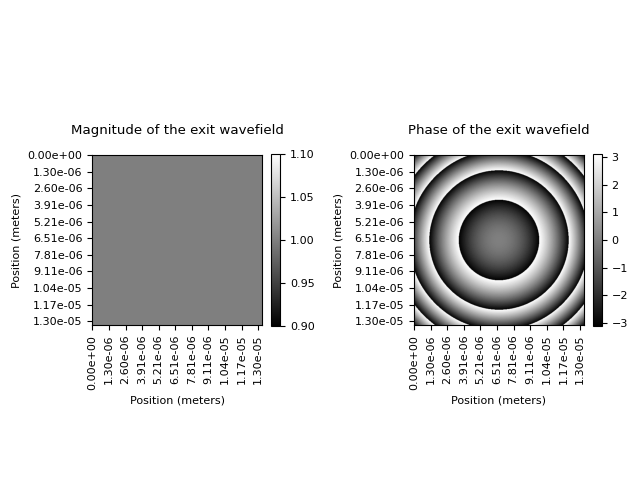

In [3]:
# Quadratic phase factor for the Fresnel zone for the focusing beam
k = 2*np.pi/Wavelength # spatial angular frequency

# Create a meshgrid for the phase factor
x = np.linspace(-256, 256, 512)*delta_f 
y = np.linspace(-256, 256, 512)*delta_f
x, y = np.meshgrid(x, y)

phase_factor = np.exp((-k*1j/(2*F))*(x**2+y**2))
plot_magnitude_phase(phase_factor, delta_f, 'Magnitude of the exit wavefield', 'Phase of the exit wavefield')

133


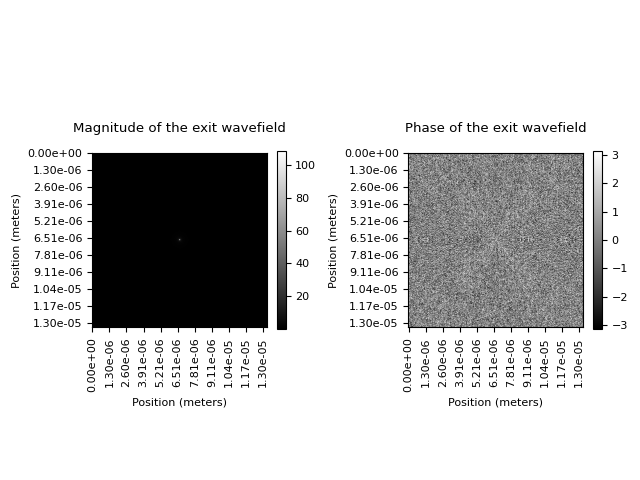

In [23]:
# Creating a layout for the focused beam with the circular aperture for the converging lense
circular_lense = np.zeros((512, 512))
radius = int(np.floor(D/(2*Delta_s))) # radius of the circular aperture in pixels
print(radius)
rx, ry = disk((256, 256), radius)
circular_lense[rx, ry] = 1
# plot_layout(circular_lense, Delta_s)

# Simulate the focusing beam
probe = np.fft.ifftshift(circular_lense) # shift the probe
beam_at_focus = np.fft.fftshift(np.fft.fft2(probe))/512 # beam at focus is the fourier transform of the beam at lense


plot_magnitude_phase(beam_at_focus, delta_f,'Magnitude of the exit wavefield', 'Phase of the exit wavefield')

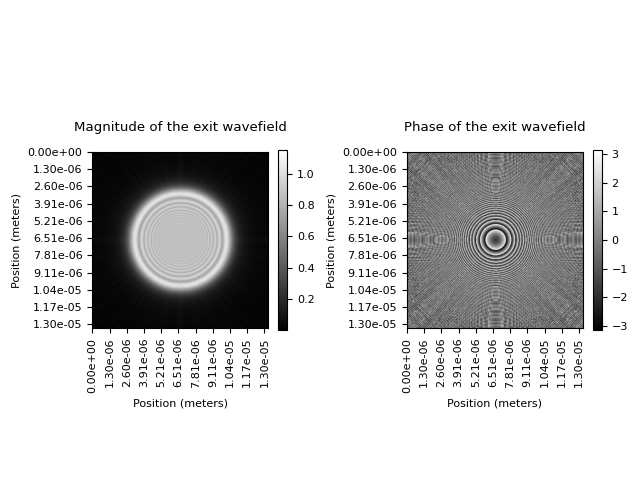

In [24]:
# Angular spectrum propagator from the focused beam to the sample
as_prop_to_sample = progapate_wf_as(D_focus_to_sample, N, delta_f, Wavelength, beam_at_focus)
plot_magnitude_phase(as_prop_to_sample, delta_f, 'Magnitude of the exit wavefield', 'Phase of the exit wavefield')


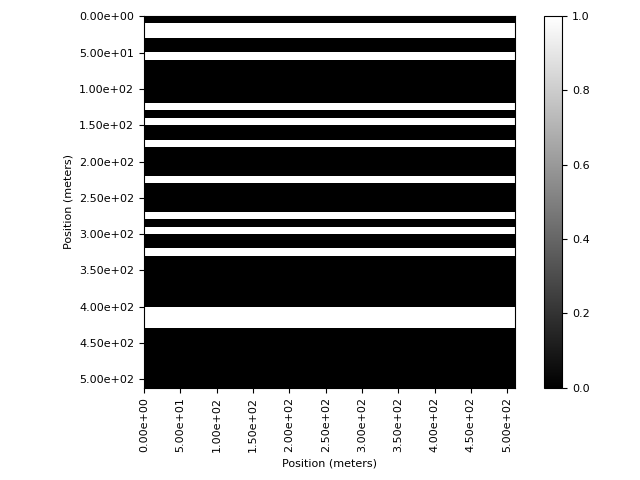

In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Create the sample chip layers

layer_1 = np.zeros((512, 512))

for i in range(5):
    layer_1[i*100+20: i*100+30, 0:512] = 1
    layer_1[i*130+10: i*130+20, 0:512] = 1
    layer_1[i*120+50: i*120+60, 0:512] = 1

plot_layout(layer_1, 1)

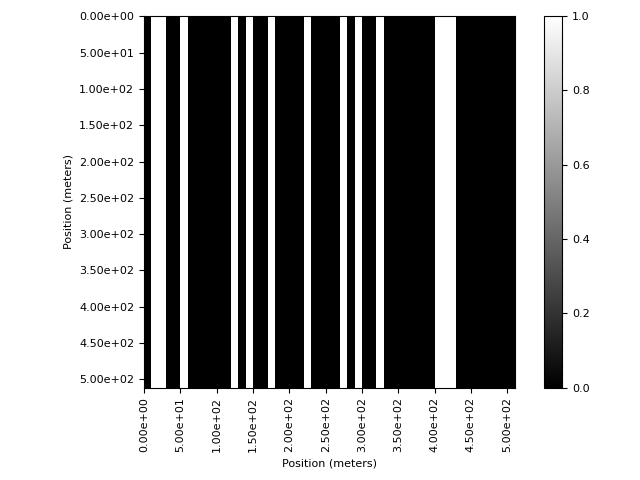

In [7]:
layer_2 = np.zeros((512, 512))

for i in range(5):
    layer_2[0:512, i*100+20: i*100+30] = 1
    layer_2[0:512, i*130+10: i*130+20] = 1
    layer_2[0:512, i*120+50: i*120+60] = 1

plot_layout(layer_2, 1)

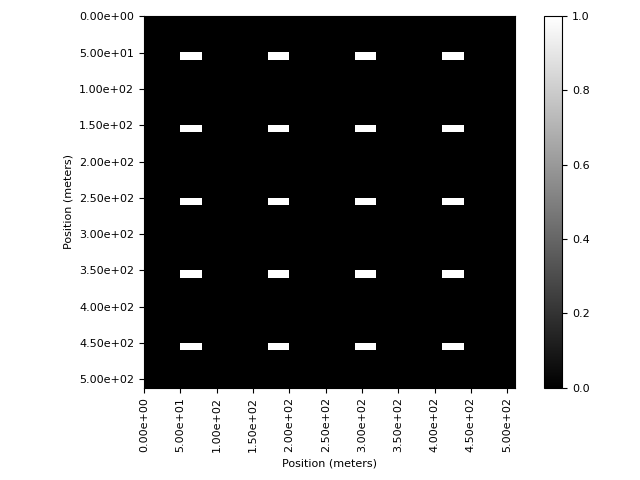

In [8]:
layer_3 = np.zeros((512, 512))

for i in range(5):
    for j in range(5):
        layer_3[i*100+50: i*100+60, j*120+50: j*120+80] = 1

plot_layout(layer_3, 1)

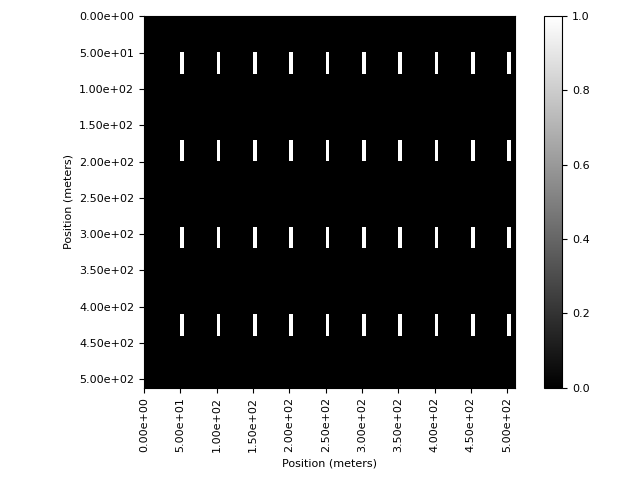

In [9]:
layer_4 = np.zeros((512, 512))

for i in range(10):
    for j in range(10):
        layer_4[i*120+50: i*120+80, j*50+50: j*50+55] = 1

plot_layout(layer_4, 1)

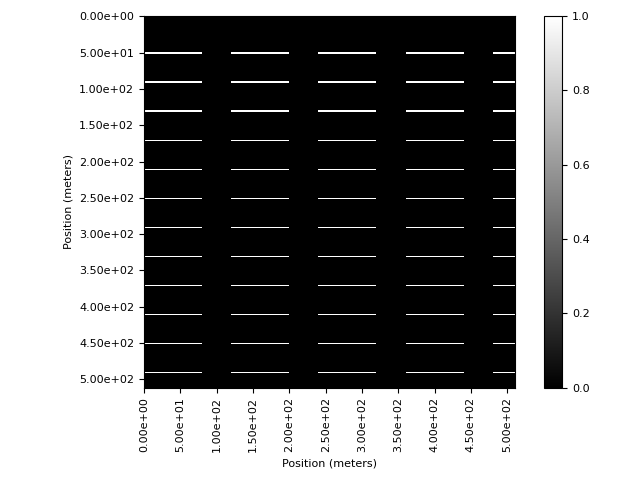

In [10]:
layer_5 = np.zeros((512, 512))

for i in range(20):
    for j in range(20):
        layer_5[i*40+50: i*40+52, j*120: j*120+80] = 1

plot_layout(layer_5, 1)

# Silicon layer
layer_6 = np.zeros((512, 512))
# plot_layout(layer_6, 1)

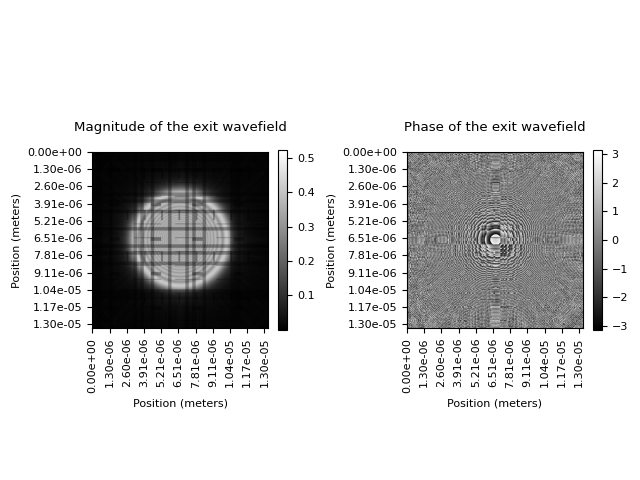

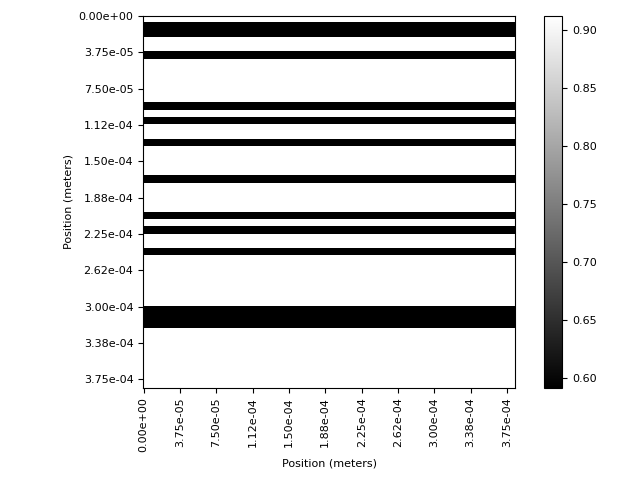

In [11]:


# Chip parameters and material properties for Energy = 6000 eV
Delta_SiO2 = 1.28858428*(10**(-5))
Beta_SiO2 = 2.92617841*(10**(-7))
Delta_Cu = 4.56380403*(10**(-5))
Beta_Cu = 1.67363646*(10**(-6))
Cu_thickness = 10e-6 # meters
Si_thickness = 10e-6 # meters

# Tranmissivity for the each component material
O_SiO2 = np.exp(-k*Si_thickness*(Beta_SiO2 + 1j*Delta_SiO2))
O_Cu = np.exp(-k*Cu_thickness*(Beta_Cu + 1j*Delta_Cu))

# Transmissivity of each layer
#layer 1
layer_1 = np.where(layer_1 != 0, layer_1 * O_Cu, layer_1)
layer_1 = np.where(layer_1 == 0, layer_1 + O_SiO2, layer_1) 

#layer 2
layer_2 = np.where(layer_2 != 0, layer_2 * O_Cu, layer_2)
layer_2 = np.where(layer_2 == 0, layer_2 + O_SiO2, layer_2) 

#layer 3
layer_3 = np.where(layer_3 != 0, layer_3 * O_Cu, layer_3)
layer_3 = np.where(layer_3 == 0, layer_3 + O_SiO2, layer_3) 

#layer 4
layer_4 = np.where(layer_4 != 0, layer_4 * O_Cu, layer_4)
layer_4 = np.where(layer_4 == 0, layer_4 + O_SiO2, layer_4) 

#layer 5
layer_5 = np.where(layer_5 != 0, layer_5 * O_Cu, layer_5)
layer_5 = np.where(layer_5 == 0, layer_5 + O_SiO2, layer_5) 

#layer 6
layer_6 = np.where(layer_6 == 0, layer_6 + O_SiO2, layer_6) 

# need to propagate f to 1 mm and plot the updated version 
all_layers = layer_1 * layer_6 * layer_2 * layer_6 *layer_3 * layer_6 * layer_4 * layer_6 * layer_5 * layer_6 
sample = all_layers #* all_layers * all_layers
single_propagation = sample * as_prop_to_sample

# QUESTION: SHOULD I MAKE AS PROPAGATION HERE FOR THE WF AFTER THE SAMPLE?
plot_layout(np.abs(layer_1), Delta_s)
plot_magnitude_phase(single_propagation, delta_f, 'Magnitude of the exit wavefield', 'Phase of the exit wavefield')


In [12]:
# f_x = np.fft.fftfreq(N, d=10)  # 10 nm
# f_y = np.fft.fftfreq(N, d=10)
# f_x, f_x = np.meshgrid(f_x, f_y, indexing='xy')
# phase = 2*np.pi*Z*np.sqrt((f_0**2 - f_x**2 - f_y**2))
# H = np.exp(phase*1j)

# as_propagation = progapate_wf_as(1000, N, f_0, 10, Wavelength, as_propagation)

# plot_magnitude_phase(beam_at_focus, 1)
# plot_magnitude_phase(as_propagation, 1)

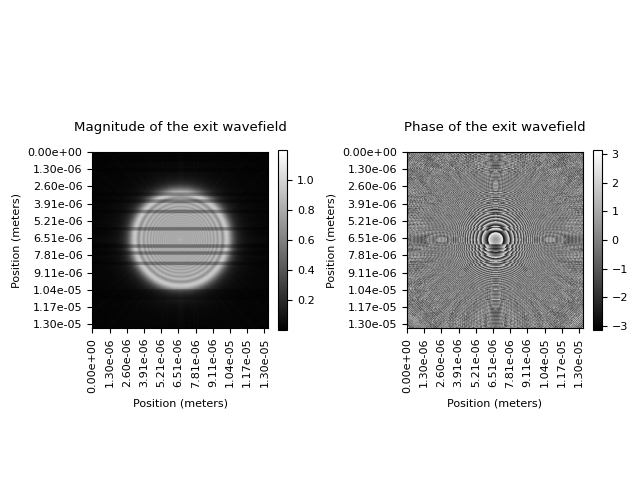

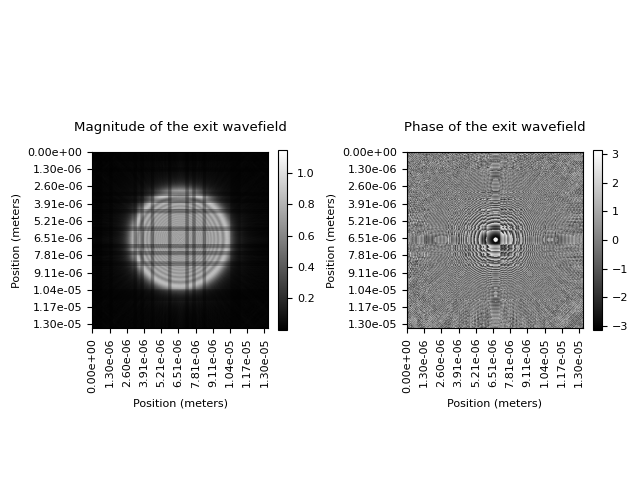

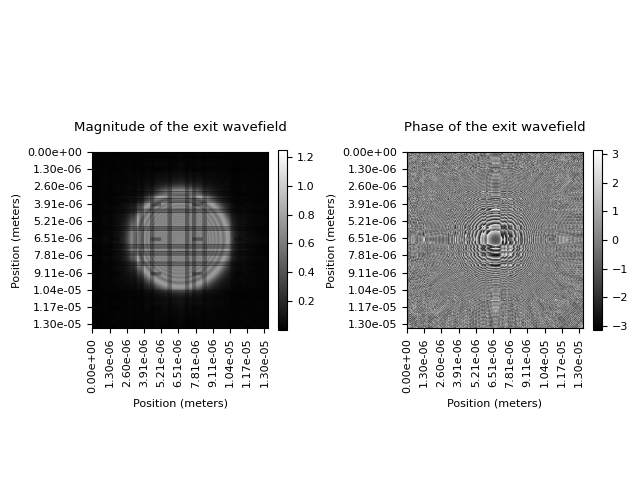

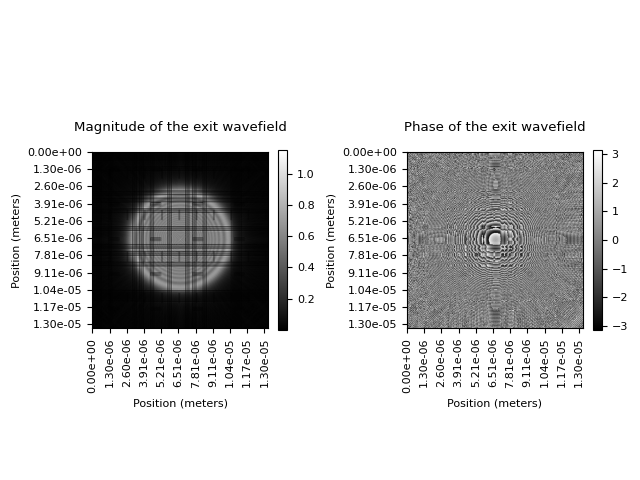

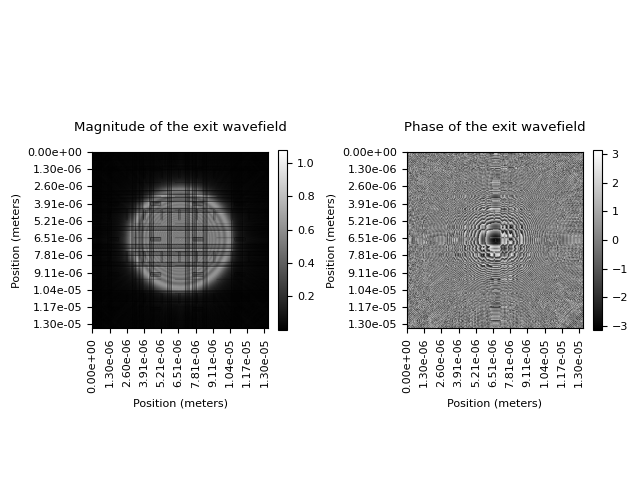

In [13]:
sub_layers = all_layers
wf_multi_as_prop = as_prop_to_sample
layers = [layer_1, layer_2, layer_3, layer_4, layer_5]

multislice_wf = []
for layer in layers:
    sub_layers = all_layers
    
    mutlislice_prop = layer * wf_multi_as_prop
    d_interslice_as_prop = Si_thickness + Cu_thickness
    wf_multi_as_prop = progapate_wf_as(d_interslice_as_prop, N, delta_f, Wavelength, mutlislice_prop)

    multislice_wf.append(np.abs(mutlislice_prop[255]))
    #plot_magnitude_phase(wavefield, delta_f)
    plot_magnitude_phase(mutlislice_prop, delta_f,'Magnitude of the exit wavefield', 'Phase of the exit wavefield') 


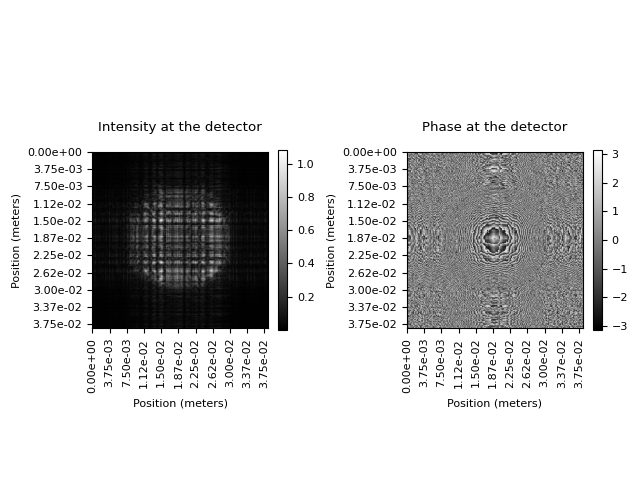

In [18]:
# Quadratic phase factor for the Fresnel zone for the focusing beam
k = 2*np.pi/Wavelength # spatial angular frequency

# Create a meshgrid for the phase factor
x = np.linspace(-256, 256, 512)*delta_f 
y = np.linspace(-256, 256, 512)*delta_f
x, y = np.meshgrid(x, y)


# Far field propagation to the detector at 5 meters distance
propagation_shifted = np.fft.ifftshift(single_propagation) 

# Fresnel propagation
detector_wf =  np.fft.fftshift(np.fft.fft2(propagation_shifted * phase_factor))/512 

plot_magnitude_phase(detector_wf, delta_d, 'Intensity at the detector', 'Phase at the detector') 


/var/folders/c7/p9xf158s0r503458slrcs7dr0000gn/T/ipykernel_15771/2120770042.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4,6))


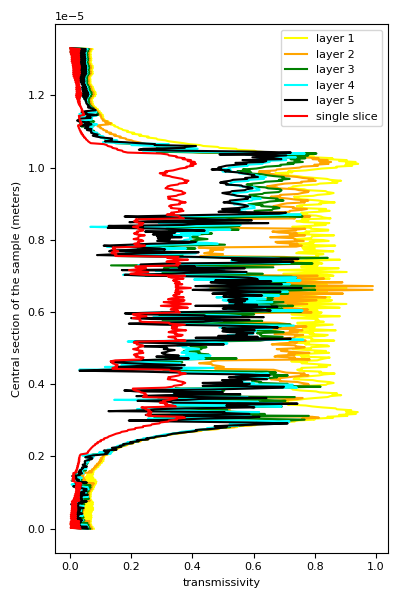

In [19]:
x_1 = multislice_wf[0]
x_2 = multislice_wf[1]
x_3 = multislice_wf[2]
x_4 = multislice_wf[3]
x_5 = multislice_wf[4]
# x_4 = np.real(beam_at_focus[255])
x_6 = np.abs(single_propagation[255])

y  = np.arange(0,512,1)*delta_f

plt.figure(figsize=(4,6))
plt.plot(x_1, y, label = 'layer 1', color = 'yellow')
plt.plot(x_2, y, label = 'layer 2', color = 'orange')
plt.plot(x_3, y, label = 'layer 3', color = 'green')
plt.plot(x_4, y, label = 'layer 4', color = 'cyan')
plt.plot(x_5, y, label = 'layer 5', color = 'black')
# plt.plot(x_4, y, label = 'at the detector')
plt.plot(x_6, y, label = 'single slice', color = 'red')
plt.ylabel('Central section of the sample (meters)')
plt.xlabel('transmissivity')
plt.legend()
plt.tight_layout()

plt.show()

In [29]:
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# from matplotlib import pyplot as plt

# # Create the sample chip layers
# size = 100
# layer_1 = np.zeros((size, size))

# for i in range(5):
#     layer_1[i*100+20: i*100+30, 0:512] = 1
#     layer_1[i*130+10: i*130+20, 0:512] = 1
#     layer_1[i*120+50: i*120+60, 0:512] = 1

# a = np.zeros((10, size, size))
# a[1] = layer_1
# a[1].shape


# fig = plt.figure()
# ax = fig.add_subplot(projection = '3d')

# cmap = plt.get_cmap("viridis")

# norm= plt.Normalize(a.min(), a.max())
# ax.voxels(np.ones_like(a), facecolors=cmap(norm(a)), edgecolor="black")
# plt.savefig('test.png', ax)
# # plt.show()

In [ ]:
x =  np.abs(propagation[255])
 
y  = np.arange(0,512,1)

plt.plot(x, y)
plt.show()